<a href="https://colab.research.google.com/github/trankhanhduy20146093/TRI_TUE_NHAN_TAO/blob/main/Recognize_VietNamese_money.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
#Khai báo các thư viện cần sử dụng
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils.image_utils import img_to_array
from keras.utils import load_img

In [120]:
#Kết nối Colab với Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [121]:
folder='/content/drive/MyDrive/TRI_TUE_NHAN_TAO/VIETNAMESE_BANKNOTES_T1/'

In [122]:
photos,labels = list(),list()
output = 0.0
for file in listdir(folder):
      if file.startswith('to1k'):
        output=0.0
      if file.startswith('to2k'):
        output=1.0
      if file.startswith('to5k'):
        output=2.0
      if file.startswith('to10k'):
        output=3.0
      if file.startswith('to20k'):
        output=4.0
      if file.startswith('to50k'):
        output=5.0
      if file.startswith('to100k'):
        output=6.0
      if file.startswith('to200k'):
        output=7.0
      if file.startswith('to500k'):
        output=8.0

      photo = load_img(folder+file,target_size=(50,100))
      photo = img_to_array(photo)
      photos.append(photo)
      labels.append(output)

In [123]:
photos = asarray(photos)
labels = asarray(labels)
save('/content/drive/MyDrive/TRI_TUE_NHAN_TAO/photo_money.npy',photos)
save('/content/drive/MyDrive/TRI_TUE_NHAN_TAO/label_money.npy',labels)
#Kiểm tra kích thước
print("kich thuoc photos",photos.shape)
print("kich thuoc labels",labels.shape)

kich thuoc photos (253, 50, 100, 3)
kich thuoc labels (253,)


In [124]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y,  test_y = train_test_split(photos,labels, test_size=0.2, train_size=0.8)
#Kiểm tra kích thước
print("kich thuoc train_x",train_x.shape)
print("kich thuoc test_x",test_x.shape)

kich thuoc train_x (202, 50, 100, 3)
kich thuoc test_x (51, 50, 100, 3)


In [125]:
#Scale lại data
train_x = train_x.astype('float32')
train_x = train_x/255
     
test_x = test_x.astype('float32')
test_x = test_x/255

In [126]:
from keras.utils import to_categorical
train_labels = to_categorical(train_y)
test_labels = to_categorical(test_y)

In [127]:
#Kiểm tra kích thước
print("kich thuoc train_x",train_x.shape)
print("kich thuoc train_labels",train_labels.shape)

kich thuoc train_x (202, 50, 100, 3)
kich thuoc train_labels (202, 9)


In [128]:
from keras import Sequential,Model,Input
from keras.layers import Dense,Flatten,Dropout, Conv2D, MaxPooling2D,Normalization
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(50,100,3),padding='same'))
     
from keras.layers import LeakyReLU
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(64,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(128,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

In [129]:
classes = 9

model.add(Flatten())
     
model.add(Dense(700,activation='linear'))
model.add(Dropout(0.5))
model.add(Dense(classes,activation='softmax'))

In [130]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 50, 100, 32)       896       
                                                                 
 leaky_re_lu_21 (LeakyReLU)  (None, 50, 100, 32)       0         
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 25, 50, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 25, 50, 64)        18496     
                                                                 
 leaky_re_lu_22 (LeakyReLU)  (None, 25, 50, 64)        0         
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 13, 25, 64)       0         
 g2D)                                                 

In [136]:
from keras.backend import categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics =['accuracy'])

batch_size = 64
epochs = 20

train = model.fit(train_x,train_labels,batch_size, epochs,verbose=1)
test_loss, test_acc = model.evaluate(test_x, test_labels)
print("Accuracy:", test_acc)
print('Loss:', test_loss)

Epoch 1/20
4/4 [==============================] - 1s 21ms/step - loss: 2.0581 - accuracy: 0.6386
Epoch 2/20
4/4 [==============================] - 0s 18ms/step - loss: 1.1892 - accuracy: 0.5297
Epoch 3/20
4/4 [==============================] - 0s 17ms/step - loss: 1.1066 - accuracy: 0.6683
Epoch 4/20
4/4 [==============================] - 0s 18ms/step - loss: 0.9541 - accuracy: 0.6980
Epoch 5/20
4/4 [==============================] - 0s 16ms/step - loss: 0.6473 - accuracy: 0.8069
Epoch 6/20
4/4 [==============================] - 0s 15ms/step - loss: 0.4987 - accuracy: 0.8762
Epoch 7/20
4/4 [==============================] - 0s 15ms/step - loss: 0.3708 - accuracy: 0.8911
Epoch 8/20
4/4 [==============================] - 0s 14ms/step - loss: 0.3641 - accuracy: 0.8861
Epoch 9/20
4/4 [==============================] - 0s 15ms/step - loss: 0.3027 - accuracy: 0.8911
Epoch 10/20
4/4 [==============================] - 0s 14ms/step - loss: 0.2941 - accuracy: 0.9010
Epoch 11/20
4/4 [============

In [137]:
model.save('/content/drive/MyDrive/TRI_TUE_NHAN_TAO/recognize_money.h5')


1/1 [==============================] - 0s 80ms/step


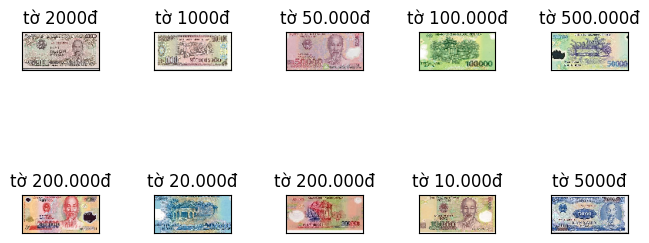

In [138]:
#test mo hinh

import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np

labels = ['tờ 1000đ', 'tờ 2000đ','tờ 5000đ','tờ 10.000đ','tờ 20.000đ','tờ 50.000đ','tờ 100.000đ','tờ 200.000đ','tờ 500.000đ']

for i in range(0 , 10):
    plt.subplot(3, 5, i+1)
    plt.tight_layout()
    img = load_img('/content/drive/My Drive/IMAGES/MONEY' + str(i+1) + '.jpg', target_size=(50,100))
    plt.imshow(img)
    img = img_to_array(img)
    img = img.reshape(1, 50,100,3)
    img = img.astype('float32') / 255
    predicted_label = labels[model.predict(img).argmax()]
    plt.title("{}".format(predicted_label))
    plt.xticks([])
    plt.yticks([])
plt.show()
